This notebook reads in the simulations from the two Topology_clique notebooks, and compare the spike times.

In [1]:
import os
os.environ["SNUDDA_DATA"] = "../../../../BasalGangliaData/data/"
assert os.path.isdir(os.getenv("SNUDDA_DATA")), f"You need to have BasalGangliaData installed for this example."

network_path = "topology100"
network_file = os.path.join(network_path, "network-synapses.hdf5")
simplex_file_name = os.path.join(network_path, "topology100_D6_simplices0.simplices")

ablated_network_file = os.path.join(network_path, "network-ablated.hdf5")
fully_ablated_network_file = os.path.join(network_path, "network-fully-ablated.hdf5")

ablated_simulation_file = os.path.join(network_path, "simulation", "TCS-output-6.hdf5")
fully_ablated_simulation_file = os.path.join(network_path, "simulation", "TCS-output-6a.hdf5")

In [2]:
from snudda.analyse.analyse_topology_activity import SnuddaAnalyseTopologyActivity
sat = SnuddaAnalyseTopologyActivity()

In [3]:
sat.load_simulation_data("ablated", ablated_simulation_file)
sat.load_simulation_data("fullyablated", fully_ablated_simulation_file)

Loading topology100/simulation/TCS-output-6.hdf5
Loading topology100/simulation/TCS-output-6a.hdf5


In [4]:
spike_time_diff = sat.get_spike_deltas("ablated", "fullyablated")

In [5]:
spike_time_diff

{0: (array([-2.50e-05,  7.50e-05,  7.50e-05,  1.00e-04, -4.00e-04, -3.25e-04,
         -3.00e-04, -2.25e-04, -7.50e-04, -6.50e-04, -6.50e-04, -6.00e-04,
         -8.75e-04, -8.00e-04, -7.75e-04, -7.50e-04, -7.75e-04, -7.25e-04,
         -7.00e-04, -7.00e-04, -7.00e-04, -7.50e-04, -7.00e-04, -6.50e-04,
         -6.75e-04, -7.25e-04, -6.75e-04, -6.50e-04, -6.25e-04, -7.50e-04,
         -7.50e-04, -7.50e-04, -7.50e-04, -9.00e-04, -8.50e-04, -8.50e-04,
         -8.50e-04, -8.50e-04, -7.75e-04, -7.25e-04, -7.25e-04]),
  array([ 2.50e-05, -7.50e-05, -7.50e-05, -1.00e-04,  4.00e-04,  3.25e-04,
          3.00e-04,  2.25e-04,  7.50e-04,  6.50e-04,  6.50e-04,  6.00e-04,
          8.75e-04,  8.00e-04,  7.75e-04,  7.50e-04,  7.75e-04,  7.25e-04,
          7.00e-04,  7.00e-04,  7.00e-04,  7.50e-04,  7.00e-04,  6.50e-04,
          6.75e-04,  7.25e-04,  6.75e-04,  6.50e-04,  6.25e-04,  7.50e-04,
          7.50e-04,  7.50e-04,  7.50e-04,  9.00e-04,  8.50e-04,  8.50e-04,
          8.50e-04,  8.50e-04, 

<IPython.core.display.Javascript object>


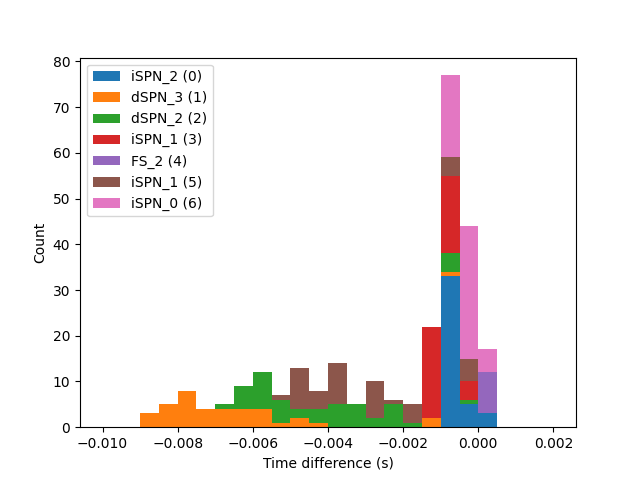

In [6]:
%matplotlib notebook
sat.plot_spike_delta_histogram("ablated", "fullyablated")